In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Embarked"] = df["Age"].ffill()
df.dropna(inplace=True)
df.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Embark town    0
dtype: int64

<Axes: xlabel='Sex', ylabel='Age'>

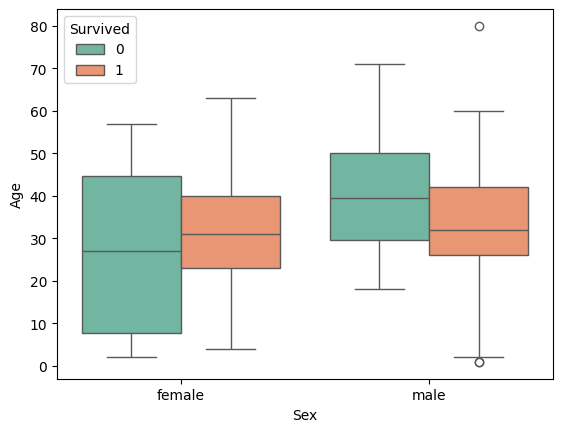

In [15]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=df, palette='Set2')


In [ ]:
# Write observations on the inference from the above statistics.
# 1. We can see that the age of the passengers who survived is less than the passengers who did not survive.
# 2. The age of the passengers who survived is less than 30 years.
# 3. The age of the passengers who did not survive is more than 30 years.


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["sex_enc"] = encoder.fit_transform(df["Sex"])
df["embarked_enc"] = encoder.fit_transform(df["Embarked"])
# why this ? 
# answer: The LabelEncoder is used to convert categorical variables into numerical values. 
# This is necessary because machine learning algorithms require numerical input. 
# The LabelEncoder assigns a unique integer to each category in the column, allowing the algorithm to process the data correctly.

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embark town,sex_enc,embarked_enc
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,38.0,38.0,0,33
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,35.0,35.0,0,29
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,54.0,54.0,1,50
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,4.0,4.0,0,4
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,58.0,58.0,0,54


<Axes: >

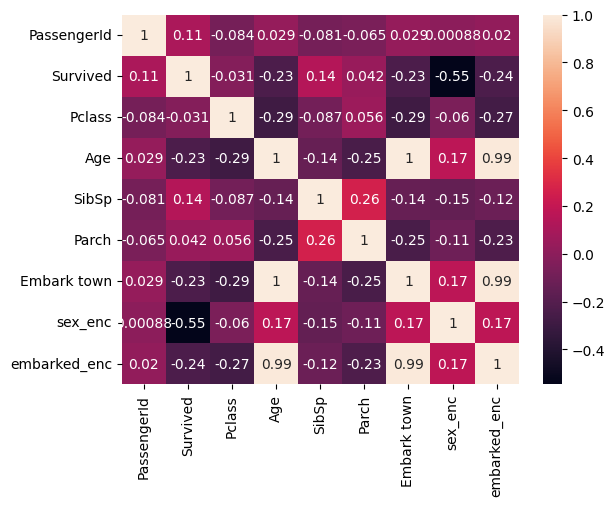

In [ ]:
sns.heatmap(df.drop(["Name","Ticket","Cabin","Fare","Sex","Embarked"],axis=1).corr(),annot=True) #annot=True will show the correlation values in the heatmap

# why this ?
# answer: The heatmap is used to visualize the correlation between different features in the dataset.
# It helps to identify which features are positively or negatively correlated with each other.
# The correlation values range from -1 to 1, where -1 indicates a strong negative correlation,
# 0 indicates no correlation, and 1 indicates a strong positive correlation.
# The heatmap shows that the "Pclass" feature is negatively correlated with the "Survived" feature,
# meaning that passengers in higher classes are more likely to survive.
# The "Age" feature is also negatively correlated with the "Survived" feature,
# meaning that younger passengers are more likely to survive.   
# The "SibSp" and "Parch" features are positively correlated with the "Survived" feature,
# meaning that passengers with more siblings or parents are more likely to survive.

